# Company

In [1]:
import pandas as pd

Problem Statement:
A cloth manufacturing company is interested to know about the segment or attributes causes high sale. 
Approach - A decision tree can be built with target variable Sale (we will first convert it in categorical variable) & all other variable will be independent in the analysis.  


In [2]:
company=pd.read_csv('Company_Data.csv')
company


,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [3]:
company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [4]:
company.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [10]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()

In [11]:
company.drop(["ShelveLoc","Urban","US"],axis=1).columns

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'Age', 'Education'],
      dtype='object')

In [15]:
company1 = pd.get_dummies(company, columns =['ShelveLoc','Urban','US'])


In [16]:
company_scaled=scale.fit_transform(company.drop(["ShelveLoc","Urban","US"],axis=1))

In [17]:
company_scaled=pd.DataFrame(company_scaled, columns=[company.drop(["ShelveLoc","Urban","US"],axis=1).columns])

In [18]:
company1["Sales"]=pd.qcut(company1["Sales"],q=4, labels=False)

In [19]:
x=company1.drop("Sales", axis=1)
y=company1["Sales"]

In [20]:
from sklearn.model_selection import train_test_split
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=40)

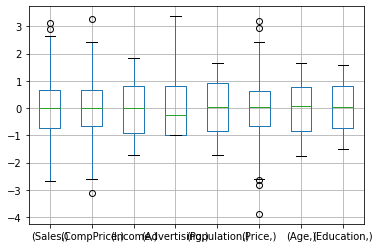

In [23]:
company_scaled.boxplot()

In [21]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=100,max_depth=5, random_state=42)
rf.fit(x_train,y_train)
rf.score(x_test,y_test)

0.4375

In [22]:
for i in range(2,50):
    rf=RandomForestClassifier(n_estimators=i,max_depth=5, random_state=42)
    rf.fit(x_train,y_train)
    print(f"Accuracy of model with {i} n_estimators is  {rf.score(x_test,y_test)}")

Accuracy of model with 2 n_estimators is  0.4
Accuracy of model with 3 n_estimators is  0.4125
Accuracy of model with 4 n_estimators is  0.425
Accuracy of model with 5 n_estimators is  0.375
Accuracy of model with 6 n_estimators is  0.4
Accuracy of model with 7 n_estimators is  0.35
Accuracy of model with 8 n_estimators is  0.3625
Accuracy of model with 9 n_estimators is  0.375
Accuracy of model with 10 n_estimators is  0.4375
Accuracy of model with 11 n_estimators is  0.425
Accuracy of model with 12 n_estimators is  0.425
Accuracy of model with 13 n_estimators is  0.4
Accuracy of model with 14 n_estimators is  0.425
Accuracy of model with 15 n_estimators is  0.4125
Accuracy of model with 16 n_estimators is  0.4125
Accuracy of model with 17 n_estimators is  0.45
Accuracy of model with 18 n_estimators is  0.45
Accuracy of model with 19 n_estimators is  0.4625
Accuracy of model with 20 n_estimators is  0.4625
Accuracy of model with 21 n_estimators is  0.425
Accuracy of model with 22 n_es

In [24]:
for i in range(2,50):
    for j in range(1,9):
        rf=RandomForestClassifier(n_estimators=i,max_depth=j, random_state=42)
        rf.fit(x_train,y_train)
        print(f"Accuracy of Model with {i} n_estimators and {j} max_depth is {rf.score(x_test,y_test)}")

Accuracy of Model with 2 n_estimators and 1 max_depth is 0.3375
Accuracy of Model with 2 n_estimators and 2 max_depth is 0.35
Accuracy of Model with 2 n_estimators and 3 max_depth is 0.4625
Accuracy of Model with 2 n_estimators and 4 max_depth is 0.375
Accuracy of Model with 2 n_estimators and 5 max_depth is 0.4
Accuracy of Model with 2 n_estimators and 6 max_depth is 0.3625
Accuracy of Model with 2 n_estimators and 7 max_depth is 0.3625
Accuracy of Model with 2 n_estimators and 8 max_depth is 0.425
Accuracy of Model with 3 n_estimators and 1 max_depth is 0.4125
Accuracy of Model with 3 n_estimators and 2 max_depth is 0.4
Accuracy of Model with 3 n_estimators and 3 max_depth is 0.3875
Accuracy of Model with 3 n_estimators and 4 max_depth is 0.45
Accuracy of Model with 3 n_estimators and 5 max_depth is 0.4125
Accuracy of Model with 3 n_estimators and 6 max_depth is 0.4125
Accuracy of Model with 3 n_estimators and 7 max_depth is 0.45
Accuracy of Model with 3 n_estimators and 8 max_depth 

Accuracy of Model with 18 n_estimators and 6 max_depth is 0.4125
Accuracy of Model with 18 n_estimators and 7 max_depth is 0.4875
Accuracy of Model with 18 n_estimators and 8 max_depth is 0.4125
Accuracy of Model with 19 n_estimators and 1 max_depth is 0.3625
Accuracy of Model with 19 n_estimators and 2 max_depth is 0.4
Accuracy of Model with 19 n_estimators and 3 max_depth is 0.4
Accuracy of Model with 19 n_estimators and 4 max_depth is 0.3875
Accuracy of Model with 19 n_estimators and 5 max_depth is 0.4625
Accuracy of Model with 19 n_estimators and 6 max_depth is 0.4125
Accuracy of Model with 19 n_estimators and 7 max_depth is 0.4625
Accuracy of Model with 19 n_estimators and 8 max_depth is 0.4125
Accuracy of Model with 20 n_estimators and 1 max_depth is 0.3875
Accuracy of Model with 20 n_estimators and 2 max_depth is 0.3625
Accuracy of Model with 20 n_estimators and 3 max_depth is 0.4125
Accuracy of Model with 20 n_estimators and 4 max_depth is 0.4
Accuracy of Model with 20 n_estima

Accuracy of Model with 34 n_estimators and 8 max_depth is 0.45
Accuracy of Model with 35 n_estimators and 1 max_depth is 0.3875
Accuracy of Model with 35 n_estimators and 2 max_depth is 0.3375
Accuracy of Model with 35 n_estimators and 3 max_depth is 0.4
Accuracy of Model with 35 n_estimators and 4 max_depth is 0.375
Accuracy of Model with 35 n_estimators and 5 max_depth is 0.4125
Accuracy of Model with 35 n_estimators and 6 max_depth is 0.4
Accuracy of Model with 35 n_estimators and 7 max_depth is 0.45
Accuracy of Model with 35 n_estimators and 8 max_depth is 0.475
Accuracy of Model with 36 n_estimators and 1 max_depth is 0.375
Accuracy of Model with 36 n_estimators and 2 max_depth is 0.325
Accuracy of Model with 36 n_estimators and 3 max_depth is 0.3875
Accuracy of Model with 36 n_estimators and 4 max_depth is 0.375
Accuracy of Model with 36 n_estimators and 5 max_depth is 0.4
Accuracy of Model with 36 n_estimators and 6 max_depth is 0.4125
Accuracy of Model with 36 n_estimators and 

#Accuracy of Model with 8 n_estimators and 7 max_depth is 0.5125

# Fraud

Use decision trees to prepare a model on fraud data 
treating those who have taxable_income <= 30000 as "Risky" and others are "Good"


In [25]:
fraud=pd.read_csv('Fraud_check.csv')

In [26]:
fraud

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [27]:
fraud["Undergrad"].value_counts()


YES    312
NO     288
Name: Undergrad, dtype: int64

In [28]:
fraud["Marital.Status"].value_counts()

Single      217
Married     194
Divorced    189
Name: Marital.Status, dtype: int64

In [29]:
fraud["Urban"].value_counts()


YES    302
NO     298
Name: Urban, dtype: int64

In [30]:
risk=lambda x: "Risky" if x<= 30000 else "Good"

In [31]:
fraud["Category"]=fraud['Taxable.Income'].apply(risk)

In [32]:
fraud.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Category
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good


In [33]:
fraud["Category"].value_counts()


Good     476
Risky    124
Name: Category, dtype: int64

In [35]:
fraud= pd.get_dummies(fraud,columns=['Undergrad','Marital.Status','Urban',"Category"])
fraud

,Taxable.Income,City.Population,Work.Experience,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES,Category_Good,Category_Risky
0,68833,50047,10,1,0,0,0,1,0,1,1,0
1,33700,134075,18,0,1,1,0,0,0,1,1,0
2,36925,160205,30,1,0,0,1,0,0,1,1,0
3,50190,193264,15,0,1,0,0,1,0,1,1,0
4,81002,27533,28,1,0,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
595,76340,39492,7,0,1,1,0,0,0,1,1,0
596,69967,55369,2,0,1,1,0,0,0,1,1,0
597,47334,154058,0,1,0,1,0,0,0,1,1,0
598,98592,180083,17,0,1,0,1,0,1,0,1,0


In [36]:
fraud=fraud.drop(['Undergrad_YES','Urban_YES','Category_Risky'],axis=1)


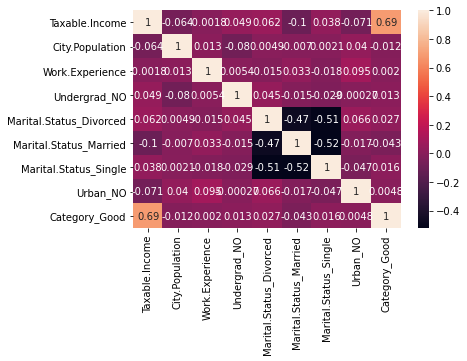

In [39]:
import seaborn as sns
sns.heatmap(fraud.corr(), annot=True)

In [40]:
x=fraud.drop("Category_Good", axis=1)
y=fraud["Category_Good"]


In [41]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.22, random_state= 42)


In [44]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=100,max_depth=5, random_state=42)
rf.fit(x_train,y_train)
rf.score(x_test,y_test)

0.9924242424242424

In [45]:
for i in range(2,50):
    for j in range(1,9):
        rf=RandomForestClassifier(n_estimators=i,max_depth=j, random_state=42)
        rf.fit(x_train,y_train)
        print(f"Accuracy of Model with {i} n_estimators and {j} max_depth is {rf.score(x_test,y_test)}")

Accuracy of Model with 2 n_estimators and 1 max_depth is 0.7878787878787878
Accuracy of Model with 2 n_estimators and 2 max_depth is 0.9696969696969697
Accuracy of Model with 2 n_estimators and 3 max_depth is 0.7803030303030303
Accuracy of Model with 2 n_estimators and 4 max_depth is 0.8787878787878788
Accuracy of Model with 2 n_estimators and 5 max_depth is 0.9696969696969697
Accuracy of Model with 2 n_estimators and 6 max_depth is 0.9015151515151515
Accuracy of Model with 2 n_estimators and 7 max_depth is 0.9242424242424242
Accuracy of Model with 2 n_estimators and 8 max_depth is 0.9166666666666666
Accuracy of Model with 3 n_estimators and 1 max_depth is 0.7878787878787878
Accuracy of Model with 3 n_estimators and 2 max_depth is 0.7954545454545454
Accuracy of Model with 3 n_estimators and 3 max_depth is 0.7878787878787878
Accuracy of Model with 3 n_estimators and 4 max_depth is 0.8863636363636364
Accuracy of Model with 3 n_estimators and 5 max_depth is 0.946969696969697
Accuracy of M

Accuracy of Model with 16 n_estimators and 3 max_depth is 0.9848484848484849
Accuracy of Model with 16 n_estimators and 4 max_depth is 0.9924242424242424
Accuracy of Model with 16 n_estimators and 5 max_depth is 0.9924242424242424
Accuracy of Model with 16 n_estimators and 6 max_depth is 0.9924242424242424
Accuracy of Model with 16 n_estimators and 7 max_depth is 1.0
Accuracy of Model with 16 n_estimators and 8 max_depth is 0.9924242424242424
Accuracy of Model with 17 n_estimators and 1 max_depth is 0.7878787878787878
Accuracy of Model with 17 n_estimators and 2 max_depth is 0.9621212121212122
Accuracy of Model with 17 n_estimators and 3 max_depth is 0.9924242424242424
Accuracy of Model with 17 n_estimators and 4 max_depth is 0.9924242424242424
Accuracy of Model with 17 n_estimators and 5 max_depth is 0.9924242424242424
Accuracy of Model with 17 n_estimators and 6 max_depth is 1.0
Accuracy of Model with 17 n_estimators and 7 max_depth is 1.0
Accuracy of Model with 17 n_estimators and 8

Accuracy of Model with 30 n_estimators and 2 max_depth is 0.9621212121212122
Accuracy of Model with 30 n_estimators and 3 max_depth is 0.9924242424242424
Accuracy of Model with 30 n_estimators and 4 max_depth is 0.9924242424242424
Accuracy of Model with 30 n_estimators and 5 max_depth is 0.9924242424242424
Accuracy of Model with 30 n_estimators and 6 max_depth is 0.9924242424242424
Accuracy of Model with 30 n_estimators and 7 max_depth is 0.9924242424242424
Accuracy of Model with 30 n_estimators and 8 max_depth is 0.9924242424242424
Accuracy of Model with 31 n_estimators and 1 max_depth is 0.7878787878787878
Accuracy of Model with 31 n_estimators and 2 max_depth is 0.9621212121212122
Accuracy of Model with 31 n_estimators and 3 max_depth is 0.9924242424242424
Accuracy of Model with 31 n_estimators and 4 max_depth is 0.9924242424242424
Accuracy of Model with 31 n_estimators and 5 max_depth is 0.9924242424242424
Accuracy of Model with 31 n_estimators and 6 max_depth is 1.0
Accuracy of Mo

Accuracy of Model with 44 n_estimators and 1 max_depth is 0.7878787878787878
Accuracy of Model with 44 n_estimators and 2 max_depth is 0.9924242424242424
Accuracy of Model with 44 n_estimators and 3 max_depth is 0.9924242424242424
Accuracy of Model with 44 n_estimators and 4 max_depth is 0.9924242424242424
Accuracy of Model with 44 n_estimators and 5 max_depth is 0.9924242424242424
Accuracy of Model with 44 n_estimators and 6 max_depth is 1.0
Accuracy of Model with 44 n_estimators and 7 max_depth is 1.0
Accuracy of Model with 44 n_estimators and 8 max_depth is 0.9924242424242424
Accuracy of Model with 45 n_estimators and 1 max_depth is 0.7878787878787878
Accuracy of Model with 45 n_estimators and 2 max_depth is 0.9924242424242424
Accuracy of Model with 45 n_estimators and 3 max_depth is 0.9924242424242424
Accuracy of Model with 45 n_estimators and 4 max_depth is 0.9924242424242424
Accuracy of Model with 45 n_estimators and 5 max_depth is 0.9924242424242424
Accuracy of Model with 45 n_e

#Accuracy of Model with 8 n_estimators and 7 max_depth is 1.0